# 大气遥相关
# 实习内容 ： 1981-2018年
- 计算太平洋西部型（WP）遥相关指数，输出1月份该指数年际变化的时间序列
- 计算太平洋西部型（WP）遥相关指数与同期环流场（500hPa高度场或海平面气压场）的相关系数 （空间场）
- 计算太平洋西部型（WP）遥相关指数与同期北半球气温的相关系数 （空间场）
WP=$\frac{1}{2}$ [Z(60°N，155°E)-Z(30°N，155°E)]
- 太平洋北美型
PNA=$\frac{1}{4}$ [Z(20°N，160°W)-Z(45°N，165°W)+Z(55°N，115°W)-Z(30°N，85°W)]

In [20]:
# 需要用到的包
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator
from cartopy.util import add_cyclic_point

plt.rcParams['font.sans-serif'] = ['SimHei']  ###防止无法显示中文并设置黑体
plt.rcParams['axes.unicode_minus'] = False  ###用来正常显示负号

In [21]:
# 读取数据
ds=xr.open_dataset('hgt.mon.mean.nc')
ds

<xarray.Dataset>
Dimensions:    (level: 17, lat: 73, lon: 144, time: 513, nbnds: 2)
Coordinates:
  * level      (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-09-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] ...
    hgt        (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    source_url:     http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history:        created 2002/03 by Hoop (netCDF2.3)\nConverted to chunked...

In [22]:
hgt=ds['hgt']
hgt

<xarray.DataArray 'hgt' (time: 513, level: 17, lat: 73, lon: 144)>
[91675152 values with dtype=float32]
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-09-01
Attributes:
    long_name:      Monthly Geopotential Heights on Pressure Levels
    units:          m
    precision:      0
    GRIB_id:        7
    GRIB_name:      HGT
    var_desc:       Geopotential height
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Individual Obs
    parent_stat:    Other
    standard_name:  geopotential_height
    cell_methods:   time: mean (montly from 6-hourly values)
    valid_range:    [-1500. 35800.]
    actual_range:   [ -347. 32301.]

In [23]:
hgt=hgt.loc[hgt.time.dt.month.isin([1])].loc['1981':'2018',:,:,:]

In [24]:
hgt

<xarray.DataArray 'hgt' (time: 38, level: 17, lat: 73, lon: 144)>
[6790752 values with dtype=float32]
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1981-01-01 1982-01-01 ... 2018-01-01
Attributes:
    long_name:      Monthly Geopotential Heights on Pressure Levels
    units:          m
    precision:      0
    GRIB_id:        7
    GRIB_name:      HGT
    var_desc:       Geopotential height
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Individual Obs
    parent_stat:    Other
    standard_name:  geopotential_height
    cell_methods:   time: mean (montly from 6-hourly values)
    valid_range:    [-1500. 35800.]
    actual_range:   [ -347. 32301.]

In [25]:
# 计算太平洋西部型遥相关系数WP 500hPa
WP500=0.5*(hgt.loc[:,500,60,155]-hgt.loc[:,500,30,155])
biaozhunWP500=(WP500-WP500.mean())/WP500.std()
biaozhunWP500

<xarray.DataArray 'hgt' (time: 38)>
array([-0.15120279, -0.50045082, -0.12867066,  1.54997314,  0.07411853,
       -0.07234033, -1.14261657, -2.19036069, -1.79604838, -1.24401116,
        1.92175331, -1.559461  , -0.91729526, -0.62437755,  0.25437558,
        0.75008247,  1.75276232, -0.02727606,  0.47969689, -0.00474393,
       -0.90602919,  0.22057738, -0.24133131,  1.11059658,  0.29943984,
        0.840211  , -1.21021297, -0.8046346 ,  0.67122001,  0.25437558,
        0.8740092 ,  1.40351429,  0.81767887, -0.69197394,  1.14439477,
       -1.2665433 ,  0.840211  ,  0.22057738])
Coordinates:
    level    float32 500.0
    lon      float32 155.0
  * time     (time) datetime64[ns] 1981-01-01 1982-01-01 ... 2018-01-01

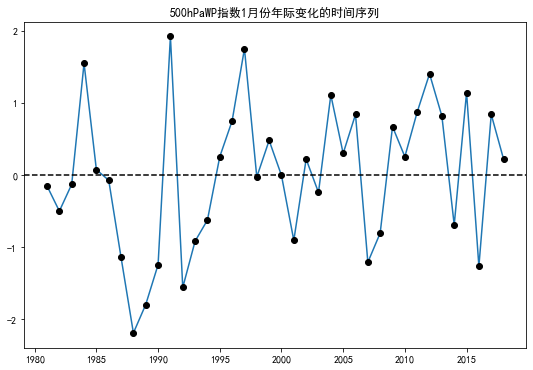

In [26]:
# 绘制500hPa的1月份WP指数年际变化的时间序列
fig=plt.figure(figsize=(9,6))
ax1=fig.subplots(1,1)
ax1.set_title('500hPaWP指数1月份年际变化的时间序列',loc='center')
ax1.plot(np.arange(1981,2019,1),biaozhunWP500,marker='o',markerfacecolor='black',markeredgecolor='black')
ax1.axhline(y=0,linestyle='--',color='black')
#保存图片
plt.savefig('data/ex3-4_1.png')

# 相关系数公式
$r=\frac{\frac{1}{n}\sum_{i=1}^{n}(X_{i}-\overline{X})(Y_{i}-\overline{Y})}{\frac{1}{n}\sqrt{\sum_{i=1}^{n}(X_{i}-\overline{X})^2}\sqrt{\sum_{i=1}^{n}(Y_{i}-\overline{Y})^2}}$

In [27]:
# 计算太平洋西部型（WP）遥相关指数与同期环流场（500hPa高度场或海平面气压场）的相关系数 （空间场）
# 500hPa 和 海平面高度 的WP
def xiangguan(WP,ds,num):
    aveWP=np.mean(WP)
    x=WP-aveWP
    y=ds.loc[:,num,:,:]-ds.loc[:,num,:,:].mean(dim='time')
    up=np.sum(x*y,axis=0)/len(WP.time)
    down=(np.sqrt(np.sum(x**2))*np.sqrt(np.sum(y**2,axis=0)))/len(WP.time)
    # 相关系数
    r=up/down
    return r

In [28]:
r500=xiangguan(biaozhunWP500,hgt,500)
r500

<xarray.DataArray 'hgt' (lat: 73, lon: 144)>
array([[ 0.09546735,  0.09546735,  0.09546735, ...,  0.09546735,
         0.09546735,  0.09546735],
       [ 0.11383944,  0.11569786,  0.11738367, ...,  0.11143487,
         0.11231806,  0.11404118],
       [ 0.12955151,  0.13107277,  0.13282081, ...,  0.12441347,
         0.12632212,  0.12681516],
       ...,
       [-0.10159363, -0.09906642, -0.09615366, ..., -0.11192648,
        -0.10979944, -0.10711465],
       [-0.10397817, -0.10024208, -0.09767719, ..., -0.11078372,
        -0.10862785, -0.10392841],
       [-0.12145519, -0.12145519, -0.12145519, ..., -0.12145519,
        -0.12145519, -0.12145519]])
Coordinates:
    level    float32 500.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0

In [29]:
r1000=xiangguan(biaozhunWP500,hgt,1000)
r1000

<xarray.DataArray 'hgt' (lat: 73, lon: 144)>
array([[ 0.05675335,  0.05675335,  0.05675335, ...,  0.05675335,
         0.05675335,  0.05675335],
       [ 0.05973064,  0.06132111,  0.06181196, ...,  0.06242106,
         0.06030107,  0.06231934],
       [ 0.05963101,  0.05774125,  0.05757195, ...,  0.06125863,
         0.0574323 ,  0.05886079],
       ...,
       [-0.16562038, -0.16196487, -0.16434817, ..., -0.17352448,
        -0.16824581, -0.16489184],
       [-0.14661595, -0.14991018, -0.14737304, ..., -0.15284256,
        -0.15186913, -0.14704016],
       [-0.13985149, -0.13985149, -0.13985149, ..., -0.13985149,
        -0.13985149, -0.13985149]])
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0

In [30]:
lon1 =r1000['lon'].data
lat1 =r1000['lat'].data
# 填充白条
r1000_fill,lon= add_cyclic_point(r1000, coord=lon1)
r500_fill,lon= add_cyclic_point(r500, coord=lon1)
lon, lat = np.meshgrid(lon, lat1) #生成网格点

In [31]:
# 创建地图
def createmap(ax1):
    # 海岸线
    ax1.coastlines('110m')
    # 标注坐标轴
    ax1.set_xticks(np.arange(-180, 181, 30), crs=ccrs.PlateCarree())
    ax1.set_yticks(np.arange(-90, 91, 20), crs=ccrs.PlateCarree())
    # 设置大小刻度
    minorticks = MultipleLocator(10)
    majorticks = MultipleLocator(30)
    ax1.xaxis.set_major_locator(majorticks)
    ax1.xaxis.set_minor_locator(minorticks)
    ax1.yaxis.set_minor_locator(minorticks)
    # 经纬度格式，把0经度设置不加E和W
    lon_formatter = LongitudeFormatter(zero_direction_label=False)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)

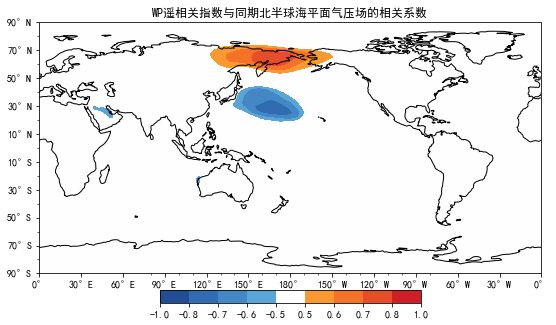

In [32]:
# 绘图部分
fig= plt.figure(figsize=(9,6))
ax1=fig.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
createmap(ax1)

# 绘图
colorbar=ax1.contourf(lon,lat,r1000_fill,levels=[-1,-0.8,-0.7,-0.6,-0.5,0.5,0.6,0.7,0.8,1],colors=['#214d95','#316cb3','#4387c5','#59a5d7','#fefefe','#fa992e','#f57329',"#e74d28",'#ce1e26'],transform=ccrs.PlateCarree())
plt.colorbar(colorbar,extendrect='True',orientation='horizontal', pad=0.05, fraction=0.04, shrink=1)
plt.title('WP遥相关指数与同期北半球海平面气压场的相关系数')
# 保存图片
plt.savefig('data/ex3-4_21000.png')

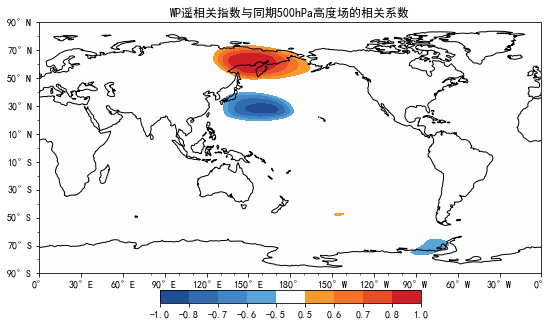

In [33]:
# 绘图部分
fig= plt.figure(figsize=(9,6))
ax1=fig.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
createmap(ax1)

# 绘图
colorbar=ax1.contourf(lon,lat,r500_fill,levels=[-1,-0.8,-0.7,-0.6,-0.5,0.5,0.6,0.7,0.8,1],colors=['#214d95','#316cb3','#4387c5','#59a5d7','#fefefe','#fa992e','#f57329',"#e74d28",'#ce1e26'],transform=ccrs.PlateCarree())
plt.colorbar(colorbar,extendrect='True',orientation='horizontal', pad=0.05, fraction=0.04, shrink=1)
plt.title('WP遥相关指数与同期500hPa高度场的相关系数')
# 保存图片
plt.savefig('data/ex3-4_2500.png')

In [34]:
air=xr.open_dataset('data/air.mon.mean.nc')['air']
air=air.loc[air.time.dt.month.isin([1])].loc['1981':'2018',:,:,:]

In [35]:
airr500=xiangguan(biaozhunWP500,air,500)
airr1000=xiangguan(biaozhunWP500,air,1000)

In [36]:
lon1 =airr500['lon'].data
lat1 =airr500['lat'].data
# 填充白条
airr500_fill,lon= add_cyclic_point(airr500, coord=lon1)
airr1000_fill,lon= add_cyclic_point(airr1000, coord=lon1)
lon, lat = np.meshgrid(lon, lat1) #生成网格点

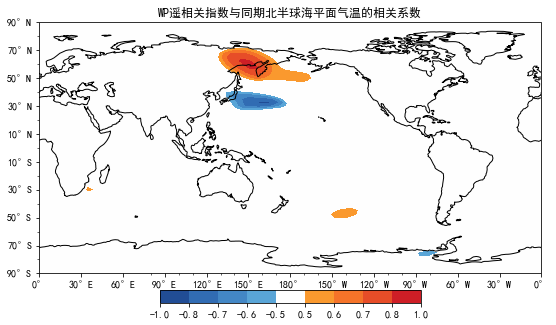

In [37]:
# 绘图部分
fig= plt.figure(figsize=(9,6))
ax1=fig.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
createmap(ax1)

# 绘图
colorbar=ax1.contourf(lon,lat,airr500_fill,levels=[-1,-0.8,-0.7,-0.6,-0.5,0.5,0.6,0.7,0.8,1],colors=['#214d95','#316cb3','#4387c5','#59a5d7','#fefefe','#fa992e','#f57329',"#e74d28",'#ce1e26'],transform=ccrs.PlateCarree())
plt.colorbar(colorbar,extendrect='True',orientation='horizontal', pad=0.05, fraction=0.04, shrink=1)
plt.title('WP遥相关指数与同期北半球海平面气温的相关系数')
# 保存图片
plt.savefig('data/ex3-4_31000.png')

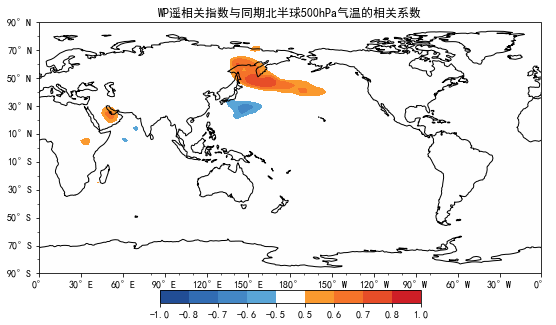

In [38]:
# 绘图部分
fig= plt.figure(figsize=(9,6))
ax1=fig.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
createmap(ax1)

# 绘图
colorbar=ax1.contourf(lon,lat,airr1000_fill,levels=[-1,-0.8,-0.7,-0.6,-0.5,0.5,0.6,0.7,0.8,1],colors=['#214d95','#316cb3','#4387c5','#59a5d7','#fefefe','#fa992e','#f57329',"#e74d28",'#ce1e26'],transform=ccrs.PlateCarree())
plt.colorbar(colorbar,extendrect='True',orientation='horizontal', pad=0.05, fraction=0.04, shrink=1)
plt.title('WP遥相关指数与同期北半球500hPa气温的相关系数')
# 保存图片
plt.savefig('data/ex3-4_3500.png')